# Day 3: Data Cleaning

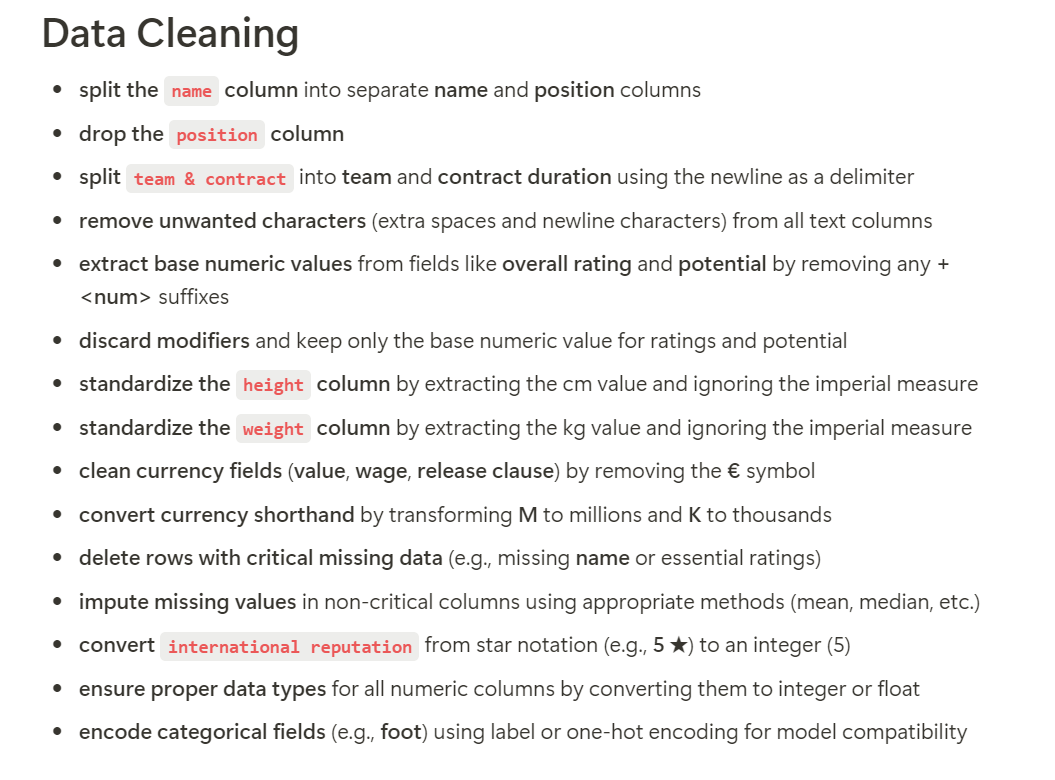

In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv("../data/raw/scraped_players_data.csv")

In [4]:
df.head()

,name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,...,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Unnamed: 64
0,K. De Winter CB,22,72,84,Genoa\n2024 ~ 2028,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,...,8,1730,372,1,67,39,57,65,72,NaN
1,Andrey Santos CM CDM,20,76,86,"RC Strasbourg Alsace\nJun 30, 2025 On loan",273018,"180cm / 5'11""",75kg / 165lbs,Right,78,...,8,2059,441,1,75,67,71,77,74,NaN
2,G. Simeone RM ST LM,21,75+1,85+1,Atlético Madrid\n2020 ~ 2028,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,...,12,1874,403,1,85,71,66,76,26,NaN
3,M. Melia ST RM LM,16,62,82,St Patrick's Athletic FC\n2023 ~ 2026,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,...,6,1594,341,1,74,61,52,64,26,NaN
4,K. De Bruyne CM CAM,33,89-1,89-1,Manchester City\n2015 ~ 2025,192985,"181cm / 5'11""",75kg / 165lbs,Right,89,...,13,2292,474,5,67,87,93,87,65,NaN


In [7]:
# Check for missing values
df.isnull().sum()

name                           0
Age                            0
Overall rating                 0
Potential                      0
Team & Contract                0
ID                             0
Height                         0
Weight                         0
foot                           0
Best overall                   0
Best position                  0
Growth                         0
Value                          0
Wage                           0
Release clause                 0
Total attacking                0
Crossing                       0
Finishing                      0
Heading accuracy               0
Short passing                  0
Volleys                        0
Total skill                    0
Dribbling                      0
Curve                          0
FK Accuracy                    0
Long passing                   0
Ball control                   0
Total movement                 0
Acceleration                   0
Sprint speed                   0
Agility   

In [6]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.expand_frame_repr', False)


In [163]:
df.drop(columns = ['Unnamed: 64'], inplace=True)

In [164]:
df.columns = df.columns.str.strip()


In [165]:
df.dtypes

name                        object
Age                          int64
Overall rating              object
Potential                   object
Team & Contract             object
ID                           int64
Height                      object
Weight                      object
foot                        object
Best overall                 int64
Best position               object
Growth                       int64
Value                       object
Wage                        object
Release clause              object
Total attacking              int64
Crossing                    object
Finishing                   object
Heading accuracy            object
Short passing               object
Volleys                     object
Total skill                  int64
Dribbling                   object
Curve                       object
FK Accuracy                 object
Long passing                object
Ball control                object
Total movement               int64
Acceleration        

In [166]:
# check duplicates
df.duplicated().sum()

np.int64(192)

In [167]:
df.drop_duplicates(inplace=True)

1. Split name column into name and postitions

In [168]:
df[['Name', 'Position']] = df['name'].str.split(r'\s+(?=[A-Z]{2,3}\b)', n=1, expand=True) 
df = df.drop('name', axis=1) 

# r'\s+(?=[A-Z]{2,3}\b means split the string on the first space before a capital letter that is followed by 2 or 3 capital letters ex, L.Messi CAM RW ---> L.Messi, CAM RW

In [169]:
df.head(5)

,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Name,Position
0,22,72,84,Genoa\n2024 ~ 2028,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,K. De Winter,CB
1,20,76,86,"RC Strasbourg Alsace\nJun 30, 2025 On loan",273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78+7,79,53,352,77,68+2,52,77,78,368,77,73,77,72,69,376,72,87+3,77,75,65,353,78,72,75,74,54,78,227,69,78+2,80+8,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,Andrey Santos,CM CDM
2,21,75+1,85+1,Atlético Madrid\n2020 ~ 2028,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63+3,75,69,72,62,313,76+2,56,46,60+2,75+2,409,84,85,82,76,82,381,74+4,86,78,79,64,313,77,27,76,71+2,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,G. Simeone,RM ST LM
3,16,62,82,St Patrick's Athletic FC\n2023 ~ 2026,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,ST,20,€1.1M,€2K,€2.8M,277,51,61,57,56,52,274,63,54,51,43,63,352,74,74,73,54,77,326,62,70,68,65,61,256,56,24,63,54,59,63,68,22,21,25,41,12,10,8,5,6,1594,341,1,74,61,52,64,26,M. Melia,ST RM LM
4,33,89-1,89-1,Manchester City\n2015 ~ 2025,192985,"181cm / 5'11""",75kg / 165lbs,Right,89,CM,0,€63.5M,€270K,€117.5M,411,95,84,55,94,83,447,86,93,83,93,92,379,67,67,75,92,78,404,92,71,76-3,75,90,406,75,66,88,94-1,83,88,189,66,70,53,56,15,13,5,10,13,2292,474,5,67,87,93,87,65,K. De Bruyne,CM CAM


In [170]:
df = df.drop('Position', axis=1)  # drop position column as we already have best position column


In [171]:
df.head(4)

,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Name
0,22,72,84,Genoa\n2024 ~ 2028,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,K. De Winter
1,20,76,86,"RC Strasbourg Alsace\nJun 30, 2025 On loan",273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78+7,79,53,352,77,68+2,52,77,78,368,77,73,77,72,69,376,72,87+3,77,75,65,353,78,72,75,74,54,78,227,69,78+2,80+8,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,Andrey Santos
2,21,75+1,85+1,Atlético Madrid\n2020 ~ 2028,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63+3,75,69,72,62,313,76+2,56,46,60+2,75+2,409,84,85,82,76,82,381,74+4,86,78,79,64,313,77,27,76,71+2,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,G. Simeone
3,16,62,82,St Patrick's Athletic FC\n2023 ~ 2026,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,ST,20,€1.1M,€2K,€2.8M,277,51,61,57,56,52,274,63,54,51,43,63,352,74,74,73,54,77,326,62,70,68,65,61,256,56,24,63,54,59,63,68,22,21,25,41,12,10,8,5,6,1594,341,1,74,61,52,64,26,M. Melia


In [172]:
# Reorder columns to place 'Name' first
cols = ['Name'] + [col for col in df.columns if col != 'Name']
df = df[cols]
df.head()

,Name,Age,Overall rating,Potential,Team & Contract,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,K. De Winter,22,72,84,Genoa\n2024 ~ 2028,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72
1,Andrey Santos,20,76,86,"RC Strasbourg Alsace\nJun 30, 2025 On loan",273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78+7,79,53,352,77,68+2,52,77,78,368,77,73,77,72,69,376,72,87+3,77,75,65,353,78,72,75,74,54,78,227,69,78+2,80+8,50,5,10,15,12,8,2059,441,1,75,67,71,77,74
2,G. Simeone,21,75+1,85+1,Atlético Madrid\n2020 ~ 2028,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63+3,75,69,72,62,313,76+2,56,46,60+2,75+2,409,84,85,82,76,82,381,74+4,86,78,79,64,313,77,27,76,71+2,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26
3,M. Melia,16,62,82,St Patrick's Athletic FC\n2023 ~ 2026,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,ST,20,€1.1M,€2K,€2.8M,277,51,61,57,56,52,274,63,54,51,43,63,352,74,74,73,54,77,326,62,70,68,65,61,256,56,24,63,54,59,63,68,22,21,25,41,12,10,8,5,6,1594,341,1,74,61,52,64,26
4,K. De Bruyne,33,89-1,89-1,Manchester City\n2015 ~ 2025,192985,"181cm / 5'11""",75kg / 165lbs,Right,89,CM,0,€63.5M,€270K,€117.5M,411,95,84,55,94,83,447,86,93,83,93,92,379,67,67,75,92,78,404,92,71,76-3,75,90,406,75,66,88,94-1,83,88,189,66,70,53,56,15,13,5,10,13,2292,474,5,67,87,93,87,65


2. Split the Team and Contract Column

In [173]:
df[['Team', 'Contract Duration']] = df['Team & Contract'].str.split('\n', n=1, expand=True)
df = df.drop('Team & Contract', axis=1)  # Drop the original column

In [174]:
df.head(3)

,Name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract Duration
0,K. De Winter,22,72,84,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,Genoa,2024 ~ 2028
1,Andrey Santos,20,76,86,273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78+7,79,53,352,77,68+2,52,77,78,368,77,73,77,72,69,376,72,87+3,77,75,65,353,78,72,75,74,54,78,227,69,78+2,80+8,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,RC Strasbourg Alsace,"Jun 30, 2025 On loan"
2,G. Simeone,21,75+1,85+1,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63+3,75,69,72,62,313,76+2,56,46,60+2,75+2,409,84,85,82,76,82,381,74+4,86,78,79,64,313,77,27,76,71+2,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,Atlético Madrid,2020 ~ 2028


3. Clean Text Columns (removing leading/trailing spaces, and replace newlines with space)

In [175]:
text_cols = df.select_dtypes(include='object').columns # select df with objects like text/string columns
for col in text_cols:
    df[col] = df[col].str.replace('\n', ' ', regex=False) # /n treted as literla, not regex pattern
    df[col] = df[col].str.strip() # remove leading and trailing whitespaces|

In [176]:
df.head(6)

,Name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract Duration
0,K. De Winter,22,72,84,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,Genoa,2024 ~ 2028
1,Andrey Santos,20,76,86,273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78+7,79,53,352,77,68+2,52,77,78,368,77,73,77,72,69,376,72,87+3,77,75,65,353,78,72,75,74,54,78,227,69,78+2,80+8,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,RC Strasbourg Alsace,"Jun 30, 2025 On loan"
2,G. Simeone,21,75+1,85+1,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63+3,75,69,72,62,313,76+2,56,46,60+2,75+2,409,84,85,82,76,82,381,74+4,86,78,79,64,313,77,27,76,71+2,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,Atlético Madrid,2020 ~ 2028
3,M. Melia,16,62,82,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,ST,20,€1.1M,€2K,€2.8M,277,51,61,57,56,52,274,63,54,51,43,63,352,74,74,73,54,77,326,62,70,68,65,61,256,56,24,63,54,59,63,68,22,21,25,41,12,10,8,5,6,1594,341,1,74,61,52,64,26,St Patrick's Athletic FC,2023 ~ 2026
4,K. De Bruyne,33,89-1,89-1,192985,"181cm / 5'11""",75kg / 165lbs,Right,89,CM,0,€63.5M,€270K,€117.5M,411,95,84,55,94,83,447,86,93,83,93,92,379,67,67,75,92,78,404,92,71,76-3,75,90,406,75,66,88,94-1,83,88,189,66,70,53,56,15,13,5,10,13,2292,474,5,67,87,93,87,65,Manchester City,2015 ~ 2025
5,Y. Ndayishimiye,25,76,81,255533,"183cm / 6'0""",79kg / 174lbs,Right,78,CB,5,€10M,€28K,€19.8M,305,59,46,75,76,49,333,71,58,59,70,75,347,68,72,68,75,64,351,60,84,83,83,41,331,70,78,59,67,57,73,225,77,75,73,51,12,9,12,12,6,1943,415,1,70,49,68,72,76,OGC Nice,2023 ~ 2027


In [177]:
df.dtypes

Name                        object
Age                          int64
Overall rating              object
Potential                   object
ID                           int64
Height                      object
Weight                      object
foot                        object
Best overall                 int64
Best position               object
Growth                       int64
Value                       object
Wage                        object
Release clause              object
Total attacking              int64
Crossing                    object
Finishing                   object
Heading accuracy            object
Short passing               object
Volleys                     object
Total skill                  int64
Dribbling                   object
Curve                       object
FK Accuracy                 object
Long passing                object
Ball control                object
Total movement               int64
Acceleration                object
Sprint speed        

4. Extract Base Numeric Values like adjusting +1, -1, as it shows the rating changes live, we are going to take ratings at the time eg. if 75+1 --> 75

In [178]:
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    # Apply cleaning only if the column contains values with '+' signs (e.g., '75+1')
    if df[col].str.contains(r'\d+\+').any():  # check if there's any + sign in the column
        # Extract the base number before '+' and convert it to int
        df[col] = df[col].astype(str).str.extract(r'^(\d+)').astype(int)



In [179]:
df.head(5)

,Name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract Duration
0,K. De Winter,22,72,84,265774,"191cm / 6'3""",75kg / 165lbs,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,Genoa,2024 ~ 2028
1,Andrey Santos,20,76,86,273018,"180cm / 5'11""",75kg / 165lbs,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78,79,53,352,77,68,52,77,78,368,77,73,77,72,69,376,72,87,77,75,65,353,78,72,75,74,54,78,227,69,78,80,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,RC Strasbourg Alsace,"Jun 30, 2025 On loan"
2,G. Simeone,21,75,85,253396,"173cm / 5'8""",75kg / 165lbs,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63,75,69,72,62,313,76,56,46,60,75,409,84,85,82,76,82,381,74,86,78,79,64,313,77,27,76,71,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,Atlético Madrid,2020 ~ 2028
3,M. Melia,16,62,82,276346,"185cm / 6'1""",78kg / 172lbs,Right,64,ST,20,€1.1M,€2K,€2.8M,277,51,61,57,56,52,274,63,54,51,43,63,352,74,74,73,54,77,326,62,70,68,65,61,256,56,24,63,54,59,63,68,22,21,25,41,12,10,8,5,6,1594,341,1,74,61,52,64,26,St Patrick's Athletic FC,2023 ~ 2026
4,K. De Bruyne,33,89,89,192985,"181cm / 5'11""",75kg / 165lbs,Right,89,CM,0,€63.5M,€270K,€117.5M,411,95,84,55,94,83,447,86,93,83,93,92,379,67,67,75,92,78,404,92,71,76,75,90,406,75,66,88,94,83,88,189,66,70,53,56,15,13,5,10,13,2292,474,5,67,87,93,87,65,Manchester City,2015 ~ 2025


5. Standarize Height and Weight

In [180]:
df['Height_cm'] = df['Height'].str.extract(r'(\d+)cm').astype(int)
df['Weight_kg'] = df['Weight'].str.extract(r'(\d+)kg').astype(int)
df = df.drop(['Height', 'Weight'], axis=1)

In [181]:
df.head(3)

,Name,Age,Overall rating,Potential,ID,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract Duration,Height_cm,Weight_kg
0,K. De Winter,22,72,84,265774,Right,74,CB,12,€5.5M,€27K,€11M,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,Genoa,2024 ~ 2028,191,75
1,Andrey Santos,20,76,86,273018,Right,78,CM,10,€16.5M,€64K,€0,333,56,67,78,79,53,352,77,68,52,77,78,368,77,73,77,72,69,376,72,87,77,75,65,353,78,72,75,74,54,78,227,69,78,80,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,RC Strasbourg Alsace,"Jun 30, 2025 On loan",180,75
2,G. Simeone,21,75,85,253396,Right,77,ST,10,€12.5M,€36K,€28.8M,341,63,75,69,72,62,313,76,56,46,60,75,409,84,85,82,76,82,381,74,86,78,79,64,313,77,27,76,71,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,Atlético Madrid,2020 ~ 2028,173,75


6. Now time for currency field: first i will try to normalize

In [182]:

def convert_currency(value):
    value = str(value).replace('€', '') # remove euro symbol
    if 'M' in value:
        return float(value.replace('M', '')) * 1e6 # eg: convert 5.5M to 5.5 to 5500000
    elif 'K' in value:
        return float(value.replace('K', '')) * 1e3 # eg: convert 5.5K to 5.5 to 5500
    else:
        return float(value) # eg: return as it is by converting to float

df['Value'] = df['Value'].apply(convert_currency)
df['Wage'] = df['Wage'].apply(convert_currency)
df['Release clause'] = df['Release clause'].apply(convert_currency)

In [183]:
df.head(3)

,Name,Age,Overall rating,Potential,ID,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Att. Position,Vision,Penalties,Composure,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,Team,Contract Duration,Height_cm,Weight_kg
0,K. De Winter,22,72,84,265774,Right,74,CB,12,5500000.0,27000.0,11000000.0,267,59,29,72,66,41,282,66,51,34,64,67,320,65,69,62,70,54,316,52,79,66,75,44,277,68,70,48,42,49,64,219,70,75,74,49,12,8,11,10,8,1730,372,1,67,39,57,65,72,Genoa,2024 ~ 2028,191,75
1,Andrey Santos,20,76,86,273018,Right,78,CM,10,16500000.0,64000.0,0.0,333,56,67,78,79,53,352,77,68,52,77,78,368,77,73,77,72,69,376,72,87,77,75,65,353,78,72,75,74,54,78,227,69,78,80,50,5,10,15,12,8,2059,441,1,75,67,71,77,74,RC Strasbourg Alsace,"Jun 30, 2025 On loan",180,75
2,G. Simeone,21,75,85,253396,Right,77,ST,10,12500000.0,36000.0,28800000.0,341,63,75,69,72,62,313,76,56,46,60,75,409,84,85,82,76,82,381,74,86,78,79,64,313,77,27,76,71,62,62,62,18,20,24,55,8,14,7,14,12,1874,403,1,85,71,66,76,26,Atlético Madrid,2020 ~ 2028,173,75


now we will recreate the dataframe in order, just for next feature engineering purpose

In [184]:
# define new column order
column_order = [
    'Name', 'ID', 'Age', 'Best position', 'Best overall', 'Overall rating', 'Potential', 'Growth', 'foot',
    'Team', 'Contract Duration', 'Value', 'Wage', 'Release clause',
    'Height_cm', 'Weight_kg', 'Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance', 'Stamina', 'Strength', 'Jumping',
    'Total attacking', 'Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys',
    'Total skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control',
    'Total defending', 'Defensive awareness', 'Standing tackle', 'Sliding tackle', 'Interceptions', 'Aggression',
    'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes',
    'Total mentality', 'Att. Position', 'Vision', 'Penalties', 'Composure',
    'Total power', 'Shot power', 'Long shots',
    'Total stats', 'Base stats', 'International reputation',
    'Pace / Diving', 'Shooting / Handling', 'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace'
]

# reorder the dataframe
df = df[column_order]
df.head()


,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,K. De Winter,265774,22,CB,74,72,84,12,Right,Genoa,2024 ~ 2028,5500000.0,27000.0,11000000.0,191,75,65,69,62,70,54,66,75,79,267,59,29,72,66,41,282,66,51,34,64,67,219,70,75,74,70,68,49,12,8,11,10,8,277,48,42,49,64,316,52,44,1730,372,1,67,39,57,65,72
1,Andrey Santos,273018,20,CM,78,76,86,10,Right,RC Strasbourg Alsace,"Jun 30, 2025 On loan",16500000.0,64000.0,0.0,180,75,77,73,77,72,69,77,75,87,333,56,67,78,79,53,352,77,68,52,77,78,227,69,78,80,72,78,50,5,10,15,12,8,353,75,74,54,78,376,72,65,2059,441,1,75,67,71,77,74
2,G. Simeone,253396,21,ST,77,75,85,10,Right,Atlético Madrid,2020 ~ 2028,12500000.0,36000.0,28800000.0,173,75,84,85,82,76,82,78,79,86,341,63,75,69,72,62,313,76,56,46,60,75,62,18,20,24,27,77,55,8,14,7,14,12,313,76,71,62,62,381,74,64,1874,403,1,85,71,66,76,26
3,M. Melia,276346,16,ST,64,62,82,20,Right,St Patrick's Athletic FC,2023 ~ 2026,1100000.0,2000.0,2800000.0,185,78,74,74,73,54,77,68,65,70,277,51,61,57,56,52,274,63,54,51,43,63,68,22,21,25,24,56,41,12,10,8,5,6,256,63,54,59,63,326,62,61,1594,341,1,74,61,52,64,26
4,K. De Bruyne,192985,33,CM,89,89,89,0,Right,Manchester City,2015 ~ 2025,63500000.0,270000.0,117500000.0,181,75,67,67,75,92,78,76,75,71,411,95,84,55,94,83,447,86,93,83,93,92,189,66,70,53,66,75,56,15,13,5,10,13,406,88,94,83,88,404,92,90,2292,474,5,67,87,93,87,65


7. I think we don't have any missing value now. We will see the outliers like who are playing at the age below 16 or age above 40 and whose height is below 150 cm and above 210 cm, similarly for weight too.

In [185]:
print(df.isnull().sum().sum())


0


In [186]:
(df == '').sum().sum()


np.int64(0)

In [187]:
df.replace(['', 'Unknown', 'N/A', '-', 0], np.nan, inplace=True)


In [188]:
df.head(5)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,K. De Winter,265774,22,CB,74,72,84,12.0,Right,Genoa,2024 ~ 2028,5500000.0,27000.0,11000000.0,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72
1,Andrey Santos,273018,20,CM,78,76,86,10.0,Right,RC Strasbourg Alsace,"Jun 30, 2025 On loan",16500000.0,64000.0,NaN,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74
2,G. Simeone,253396,21,ST,77,75,85,10.0,Right,Atlético Madrid,2020 ~ 2028,12500000.0,36000.0,28800000.0,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26
3,M. Melia,276346,16,ST,64,62,82,20.0,Right,St Patrick's Athletic FC,2023 ~ 2026,1100000.0,2000.0,2800000.0,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26
4,K. De Bruyne,192985,33,CM,89,89,89,NaN,Right,Manchester City,2015 ~ 2025,63500000.0,270000.0,117500000.0,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65


In [189]:
# Let's see the height outliers
df[(df['Height_cm'] < 160) | (df['Height_cm'] > 205)]

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
2034,K. Scherpen,243675,24,GK,72,72,78,6.0,Right,SK Sturm Graz,"Jun 30, 2025 On loan",3000000.0,27000.0,NaN,206,85,37,46,37.0,65,42.0,32,66,60.0,64,11,9,10,26,8.0,79,12,12.0,13,25,17,35,14,11,10.0,7,25,358,76,67,70.0,72,73,86,8,34.0,12.0,51.0,219,53,8,1068,399,1,76,67,70,73,41
2838,J. Nisbet,247822,25,CM,73,71,75,4.0,Right,Ross County FC,2024 ~ 2027,2600000.0,7000.0,4700000.0,158,58,71,74,85.0,71,92.0,92,43,59.0,289,58,62,48,76,45.0,324,67,61.0,52,71,73,169,53,57,59.0,64,82,54,7,11,14.0,9,13,333,65,70.0,52.0,68.0,308,58,56,1870,394,1,73,59,69,72,57
3553,M. Moralez,183895,37,CAM,73,73,73,NaN,Right,New York City FC,2023 ~ 2024,1000000.0,6000.0,1500000.0,159,54,67,53,75.0,73,81.0,69,33,43.0,339,72,68,56,74,69.0,366,75,76.0,69,70,76,159,48,59,52.0,44,65,48,6,5,14.0,14,9,320,75,76.0,60.0,75.0,280,67,68,1861,377,1,59,68,73,76,52
4202,K. Hudlin,270513,24,ST,63,61,64,3.0,Right,Newport County,"Jun 30, 2025 On loan",450000.0,8000.0,NaN,206,80,68,59,37.0,58,39.0,67,84,80.0,258,34,56,62,56,50.0,239,54,53.0,34,35,63,73,24,24,25.0,20,50,52,9,14,9.0,9,11,242,60,55.0,57.0,54.0,352,65,56,1477,322,1,63,58,47,54,27


In [190]:
#Let's see the weight outliers
df[(df['Weight_kg'] < 50) | (df['Weight_kg'] > 100)]


,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
660,Z. Ibrahimović,41236,40,ST,80,80,80,NaN,Right,Sweden,Free,NaN,NaN,NaN,195,102,55,55,67.0,77,45.0,29,85,77.0,401,71,84,82,77,87.0,380,74,77.0,74,72,83,89,28,37,24.0,20,84,59,13,15,10.0,9,12,346,86,83.0,73.0,90.0,361,86,84,1935,395,5,55,84,76,76,34
2256,L. Unnerstall,199833,33,GK,80,80,80,NaN,Right,FC Twente,2021 ~ 2027,7000000.0,9000.0,10500000.0,198,103,30,34,20.0,75,20.0,35,82,60.0,74,10,13,10,26,15.0,88,16,13.0,11,29,19,43,11,17,15.0,21,36,389,80,80,66.0,80,83,128,13,42.0,16.0,58.0,239,50,12,1140,421,1,80,80,66,83,32
2904,T. Chorý,244793,29,ST,75,75,75,NaN,Right,SK Slavia Praha,2024 ~ 2027,5500000.0,29000.0,12100000.0,200,101,47,62,38.0,75,32.0,75,95,88.0,350,44,76,86,69,75.0,310,66,49.0,68,55,72,84,27,26,31.0,22,89,44,5,6,11.0,10,12,330,79,67.0,73.0,74.0,403,77,68,1775,374,1,55,75,60,64,32


In [191]:
# Let's see the age outliers
df[(df['Age'] < 17) ]

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
3,M. Melia,276346,16,ST,64,62,82,20.0,Right,St Patrick's Athletic FC,2023 ~ 2026,1100000.0,2000.0,2800000.0,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26
28,Lamine Yamal,277643,16,CAM,86,84,94,10.0,Left,FC Barcelona,2022 ~ 2026,87000000.0,95000.0,195800000.0,180,72,86,83,88.0,80,77.0,57,45,57.0,344,83,80,33,83,65.0,394,87,83.0,65,73,86,71,23,20,28.0,18,45,46,9,13,7.0,10,7,294,80,82.0,69.0,75.0,319,80,80,1882,400,3,84,79,80,85,23
150,F. Mastantuono,279173,16,CAM,75,73,87,14.0,Left,River Plate,2023 ~ 2026,7000000.0,8000.0,14200000.0,177,71,81,72,83.0,70,82.0,66,67,69.0,319,69,65,48,73,64.0,358,76,70.0,68,68,76,157,51,54,52.0,50,64,45,7,13,10.0,6,9,324,72,73.0,65.0,74.0,339,69,68,1930,409,1,76,67,71,77,52
418,A. Bouaddi,278901,16,CAM,72,70,85,15.0,Right,Lille OSC,2023 ~ 2027,3600000.0,11000.0,9100000.0,186,72,77,73,67.0,68,64.0,72,71,75.0,294,58,59,56,75,46.0,334,73,61.0,52,73,75,165,51,61,53.0,63,66,48,9,7,12.0,12,8,311,59,69.0,54.0,70.0,333,61,54,1834,400,1,75,58,68,72,57
540,M. Moore,72159,16,CAM,67,66,86,20.0,Right,Tottenham Hotspur,2024 ~ 2027,2300000.0,26000.0,6700000.0,180,74,76,75,74.0,61,77.0,61,53,62.0,287,64,61,51,63,48.0,314,69,65.0,55,58,67,97,38,32,27.0,29,39,41,6,6,5.0,10,14,247,60,65.0,54.0,67.0,301,62,63,1650,356,1,75,61,63,69,35
1081,K. Karetsas,70497,16,CAM,69,67,85,18.0,Left,KRC Genk,2024 ~ 2027,2500000.0,9000.0,5300000.0,171,62,84,64,87.0,47,87.0,51,31,42.0,279,66,58,23,70,62.0,363,75,74.0,70,69,75,69,18,29,22.0,21,24,49,11,12,11.0,6,9,217,46,71.0,55.0,57.0,246,64,58,1592,334,1,73,59,69,75,23
1328,P. Miller,73673,16,LM,58,57,81,24.0,Left,New England Revolution,2023 ~ 2027,500000.0,2000.0,1300000.0,170,72,78,72,79.0,47,78.0,60,52,52.0,223,58,45,38,51,31.0,254,60,51.0,39,45,59,154,49,53,52.0,51,54,50,7,13,8.0,12,10,230,46,39.0,40.0,38.0,256,50,42,1521,334,1,75,45,49,61,50
2283,V. Gebel,74512,16,CAM,65,63,84,21.0,Right,RB Leipzig,2024 ~ 2028,1500000.0,14000.0,4100000.0,175,69,75,69,78.0,62,85.0,50,44,46.0,277,59,57,44,61,56.0,313,67,60.0,60,59,67,133,47,44,42.0,35,50,53,14,5,10.0,13,11,254,58,63.0,48.0,64.0,255,62,53,1654,349,1,72,57,61,69,43
2286,A. Stepanov,74749,16,ST,64,62,82,20.0,Right,Bayer 04 Leverkusen,2024 ~ 2027,1100000.0,21000.0,2900000.0,192,88,62,66,51.0,54,43.0,55,77,76.0,262,40,66,65,47,44.0,254,62,45.0,43,44,60,61,17,22,22.0,14,56,42,7,6,6.0,9,14,244,61,54.0,59.0,55.0,336,68,60,1475,323,1,64,64,46,59,23
2292,B. Mamuzah Lum,75212,16,CDM,60,59,82,23.0,Right,Hertha BSC,2024 ~ 2026,675000.0,4000.0,1800000.0,173,70,76,69,74.0,49,78.0,55,52,61.0,229,43,34,52,61,39.0,259,62,50.0,31,52,64,173,56,60,57.0,60,60,51,11,10,9.0,7,14,252,42,56.0,34.0,42.0,261,49,44,1571,341,1,72,40,53,63,58


In [192]:
df[(df['Age'] > 40)]

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
1320,G. Buffon,1179,44,GK,77,77,77,NaN,Right,Parma,2021 ~ 2024,1200000.0,3000.0,1900000.0,192,92,33,27,50.0,74,49.0,34,65,69.0,95,13,15,13,37,17.0,122,26,20.0,13,35,28,35,13,11,11.0,28,38,376,73,73,69.0,86,75,150,12,50.0,22.0,70.0,233,52,13,1244,407,4,73,73,69,75,31
1681,Pepe Reina,24630,41,GK,75,75,75,NaN,Right,Como,2024 ~ 2025,625000.0,8000.0,1100000.0,188,92,43,49,50.0,70,60.0,34,70,65.0,86,11,14,13,37,11.0,94,10,11.0,11,39,23,66,20,22,24.0,22,32,372,74,74,76.0,76,72,156,13,65.0,24.0,64.0,241,57,15,1287,417,3,74,74,76,72,45
2296,Pepe,120533,41,CB,81,81,81,NaN,Right,Portugal,Free,NaN,NaN,NaN,188,79,69,77,62.0,81,48.0,82,84,88.0,269,46,46,81,73,23.0,284,58,44.0,47,75,60,245,83,82,80.0,79,94,47,8,15,5.0,9,10,318,40,48.0,57.0,80.0,373,63,56,1873,412,3,73,51,60,61,81
2316,Ó. Cardozo,179752,41,ST,72,72,72,NaN,Left,Libertad,2017 ~ 2024,NaN,15000.0,NaN,193,87,41,38,41.0,63,30.0,31,82,71.0,350,52,78,79,64,77.0,334,63,67.0,74,58,72,70,22,28,20.0,12,72,50,12,7,6.0,14,11,313,79,75.0,75.0,76.0,340,80,76,1670,338,1,39,78,64,63,27
2343,B. Friedel,11983,43,GK,77,77,77,NaN,Right,Tottenham Hotspur,2011 ~ 2015,925000.0,35000.0,NaN,188,92,45,39,43.0,73,42.0,37,68,50.0,124,25,25,25,24,25.0,119,25,25.0,25,22,22,75,25,25,25.0,25,43,384,72,80,76.0,82,74,158,25,25.0,40.0,NaN,208,28,25,1310,426,2,72,80,76,74,42
2801,K. Miura,254704,54,CAM,57,56,56,NaN,Right,Yokohama FC,2005 ~ 2022,NaN,700.0,NaN,177,72,20,24,20.0,36,55.0,15,45,25.0,289,44,66,56,61,62.0,291,64,69.0,54,36,68,42,16,13,13.0,16,45,41,6,14,8.0,6,7,253,67,66.0,59.0,72.0,196,50,61,1267,253,1,22,61,55,59,19
3601,Rubén Castro,115909,41,ST,70,70,70,NaN,Right,Málaga CF,2022 ~ 2023,NaN,5000.0,NaN,169,68,67,63,76.0,75,81.0,55,65,88.0,327,60,73,62,63,69.0,326,67,70.0,74,47,68,62,36,12,14.0,37,54,57,14,8,15.0,8,12,321,78,74.0,78.0,68.0,354,75,71,1809,360,2,65,73,63,69,29
3738,R. Santa Cruz,25798,42,ST,69,69,69,NaN,Right,Libertad,2022 ~ 2024,NaN,13000.0,NaN,191,93,30,32,30.0,59,28.0,30,80,66.0,354,58,78,78,63,77.0,308,63,73.0,52,45,75,91,35,25,31.0,35,66,41,13,6,8.0,6,8,316,77,63.0,75.0,76.0,312,76,60,1601,326,1,31,74,59,62,36
4698,C. Dundas,262371,42,ST,52,52,52,NaN,Right,Sutton United,2019 ~ 2024,NaN,1000.0,NaN,188,88,30,33,49.0,51,38.0,32,84,61.0,228,34,54,52,44,44.0,206,49,39.0,35,32,51,56,20,20,16.0,18,42,53,11,13,10.0,12,7,210,54,40.0,56.0,53.0,279,55,47,1233,255,1,32,52,39,49,22


In [193]:
df.head(5)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Contract Duration,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace
0,K. De Winter,265774,22,CB,74,72,84,12.0,Right,Genoa,2024 ~ 2028,5500000.0,27000.0,11000000.0,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72
1,Andrey Santos,273018,20,CM,78,76,86,10.0,Right,RC Strasbourg Alsace,"Jun 30, 2025 On loan",16500000.0,64000.0,NaN,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74
2,G. Simeone,253396,21,ST,77,75,85,10.0,Right,Atlético Madrid,2020 ~ 2028,12500000.0,36000.0,28800000.0,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26
3,M. Melia,276346,16,ST,64,62,82,20.0,Right,St Patrick's Athletic FC,2023 ~ 2026,1100000.0,2000.0,2800000.0,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26
4,K. De Bruyne,192985,33,CM,89,89,89,NaN,Right,Manchester City,2015 ~ 2025,63500000.0,270000.0,117500000.0,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65


9. Standarize contract duration

In [195]:

df['On Loan'] = df['Contract Duration'].str.contains('On loan', case=False).astype(int)

df['Contract End Year'] = df['Contract Duration'].str.extract(r'(\d{4})\D*$')

df['Contract End Year'] = df['Contract End Year'].fillna(0).astype(int)

df = df.drop('Contract Duration', axis=1)

In [196]:
df.head(3)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
0,K. De Winter,265774,22,CB,74,72,84,12.0,Right,Genoa,5500000.0,27000.0,11000000.0,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028
1,Andrey Santos,273018,20,CM,78,76,86,10.0,Right,RC Strasbourg Alsace,16500000.0,64000.0,NaN,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025
2,G. Simeone,253396,21,ST,77,75,85,10.0,Right,Atlético Madrid,12500000.0,36000.0,28800000.0,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5099
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      4908 non-null   object 
 1   ID                        4908 non-null   int64  
 2   Age                       4908 non-null   int64  
 3   Best position             4908 non-null   object 
 4   Best overall              4908 non-null   int64  
 5   Overall rating            4908 non-null   int64  
 6   Potential                 4908 non-null   int64  
 7   Growth                    3623 non-null   float64
 8   foot                      4908 non-null   object 
 9   Team                      4908 non-null   object 
 10  Value                     4822 non-null   float64
 11  Wage                      4832 non-null   float64
 12  Release clause            4308 non-null   float64
 13  Height_cm                 4908 non-null   int64  
 14  Weight_kg    

In [198]:
df.head(5)

,Name,ID,Age,Best position,Best overall,Overall rating,Potential,Growth,foot,Team,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
0,K. De Winter,265774,22,CB,74,72,84,12.0,Right,Genoa,5500000.0,27000.0,11000000.0,191,75,65,69,62.0,70,54.0,66,75,79.0,267,59,29,72,66,41.0,282,66,51.0,34,64,67,219,70,75,74.0,70,68,49,12,8,11.0,10,8,277,48,42.0,49.0,64.0,316,52,44,1730,372,1,67,39,57,65,72,0,2028
1,Andrey Santos,273018,20,CM,78,76,86,10.0,Right,RC Strasbourg Alsace,16500000.0,64000.0,NaN,180,75,77,73,77.0,72,69.0,77,75,87.0,333,56,67,78,79,53.0,352,77,68.0,52,77,78,227,69,78,80.0,72,78,50,5,10,15.0,12,8,353,75,74.0,54.0,78.0,376,72,65,2059,441,1,75,67,71,77,74,1,2025
2,G. Simeone,253396,21,ST,77,75,85,10.0,Right,Atlético Madrid,12500000.0,36000.0,28800000.0,173,75,84,85,82.0,76,82.0,78,79,86.0,341,63,75,69,72,62.0,313,76,56.0,46,60,75,62,18,20,24.0,27,77,55,8,14,7.0,14,12,313,76,71.0,62.0,62.0,381,74,64,1874,403,1,85,71,66,76,26,0,2028
3,M. Melia,276346,16,ST,64,62,82,20.0,Right,St Patrick's Athletic FC,1100000.0,2000.0,2800000.0,185,78,74,74,73.0,54,77.0,68,65,70.0,277,51,61,57,56,52.0,274,63,54.0,51,43,63,68,22,21,25.0,24,56,41,12,10,8.0,5,6,256,63,54.0,59.0,63.0,326,62,61,1594,341,1,74,61,52,64,26,0,2026
4,K. De Bruyne,192985,33,CM,89,89,89,NaN,Right,Manchester City,63500000.0,270000.0,117500000.0,181,75,67,67,75.0,92,78.0,76,75,71.0,411,95,84,55,94,83.0,447,86,93.0,83,93,92,189,66,70,53.0,66,75,56,15,13,5.0,10,13,406,88,94.0,83.0,88.0,404,92,90,2292,474,5,67,87,93,87,65,0,2025


In [199]:
df.describe()

,ID,Age,Best overall,Overall rating,Potential,Growth,Value,Wage,Release clause,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,On Loan,Contract End Year
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,3623.000000,4.822000e+03,4832.000000,4.308000e+03,4908.000000,4908.000000,4908.000000,4908.000000,4905.000000,4908.000000,4905.000000,4908.000000,4908.000000,4905.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4905.000000,4908.000000,4908.000000,4905.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4905.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4905.000000,4908.000000,4908.000000,4908.000000,4908.000000,4905.000000,4905.000000,4880.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000
mean,239914.306438,24.339038,71.785860,70.621638,76.672372,8.196798,7.773326e+06,26652.204056,1.556057e+07,181.839038,75.024450,68.885289,68.968011,67.681346,67.314792,66.997554,65.995721,66.176243,69.389399,279.513855,55.562551,53.124287,56.177262,65.805420,48.874210,293.042584,63.709454,55.330479,47.938468,60.027302,66.070701,151.096373,49.870619,51.992869,49.262997,50.318052,60.214548,72.168500,14.512429,14.354116,14.341488,14.399756,14.569478,281.428484,57.574572,60.994495,52.348624,64.648361,318.377139,63.497555,53.360636,1735.391606,381.794214,1.320905,71.269356,58.844336,63.254482,68.636308,53.006724,0.099022,1997.211288
std,44022.572576,4.731379,6.973471,7.146526,5.722920,4.835125,1.363132e+07,33929.767463,2.742322e+07,6.974156,7.117247,14.151488,13.918479,14.018769,9.125494,14.142885,14.885165,12.640348,11.596519,71.560706,17.697201,19.933025,16.904603,12.845313,18.391094,74.625557,17.446566,18.086046,17.468149,13.860894,15.240591,63.887889,21.226528,21.842307,21.630040,21.801859,16.395043,78.072103,16.101688,15.510960,15.311269,15.826356,16.417751,63.315845,19.546028,13.350380,15.837997,11.862976,51.649374,12.840567,19.522127,264.877958,41.289215,0.732318,10.520157,14.205593,10.059586,9.241389,17.845833,0.298722,240.269430
min,41.000000,16.000000,50.000000,47.000000,48.000000,1.000000,1.000000e+03,500.000000,2.300000e+04,158.000000,53.000000,15.000000,15.000000,20.000000,30.000000,20.000000,15.000000,27.000000,25.000000,46.000000,8.000000,4.000000,6.000000,15.000000,4.000000,52.000000,5.000000,8.000000,7.000000,13.000000,10.000000,25.000000,5.000000,9.000000,8.000000,6.000000,11.000000,10.000000,2.000000,2.000000,1.000000,2.000000,2.000000,65.000000,3.000000,21.000000,10.000000,20.000000,133.000000,21.000000,5.000000,788.000000,230.000000,1.000000,22.000000,21.000000,27.000000,29.000000,15.000000,0.000000,0.000000
25%,228926.000000,21.000000,67.000000,66.000000,73.000000,4.000000,1.300000e+06,7000.000000,2.300000e+06,177.000000,70.000000,63.000000,63.000000,60.000000,61.000000,59.000000,60.000000,58.000000,62.000000,252.000000,46.000000,40.000000,48.000000,61.000000,36.000000,261.000000,59.000000,45.000000,36.000000,52.000000,62.000000,93.000000,32.000000,32.000000,29.000000,29.000000,51.000000,46.000000,8.000000,8.000000,8.000000,8.000000,8.000000,254.000000,50.000000,53.000000,43.000000,58.000000,288.000000,55.000000,41.000000,1593.000000,352.000000,1.000000,65.000000,50.000000,56.000000,63.000000,37.000000,0.000000,2025.000000
50%,255270.000000,23.000000,72.0000

That's it for data cleaning. Now we are ready for Feature engineering and Exploratory Data Analysis

In [ ]:
df.to_csv('cleaned_data.csv', index=False) # index = false means don't write row numbers to csv file